# TANDEM output visualization tutorial

## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors

## Bathymetry

In [18]:
ncd = xr.open_mfdataset("_output_example/model4/d/d_*.nc", data_vars="minimal", combine='by_coords', parallel=True )
ncd

<xarray.Dataset> Size: 3MB
Dimensions:    (longitude: 650, latitude: 590)
Coordinates:
    time       int64 8B 0
  * longitude  (longitude) float64 5kB 158.7 158.9 159.0 ... 245.0 245.1 245.3
  * latitude   (latitude) float64 5kB 69.27 69.13 69.0 ... -9.0 -9.133 -9.267
Data variables:
    d          (latitude, longitude) float64 3MB dask.array<chunksize=(197, 163), meta=np.ndarray>

Text(0.5, 1.0, 'Bathymetry')

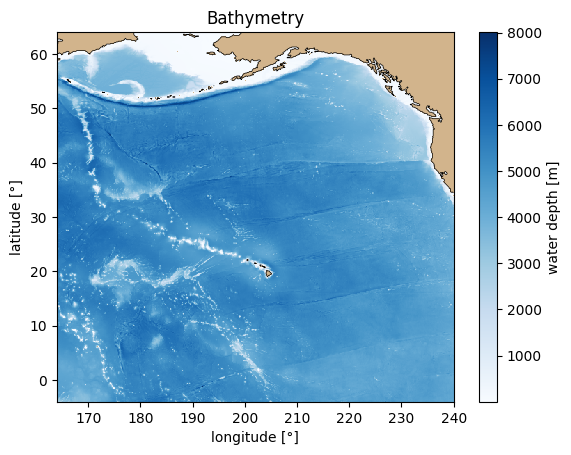

In [19]:
dep0 = ncd.d[40:-40,40:-40].copy()
depN = dep0.copy()
depN.data[depN.data==0]=np.nan
cmap=plt.cm.Blues
cmap.set_bad("tan")
fig,ax=plt.subplots()
depN.plot(ax=ax,cmap=cmap)
dep0.plot.contour(ax=ax, levels=[0], linewidths=0.5, colors="k")
ax.set_title("Bathymetry")

## Maximum tsunami height distribution
* example files based on 7-hours simulation

In [24]:
nchmax = xr.open_mfdataset("_output_example/model4/hmax/*.nc", data_vars="minimal", combine='by_coords', parallel=True )
hmax = nchmax.hmax[40:-40,40:-40].copy()
hmax.data[dep0.data==0]=np.nan

Text(0.5, 1.0, 'Maximum tsunami height')

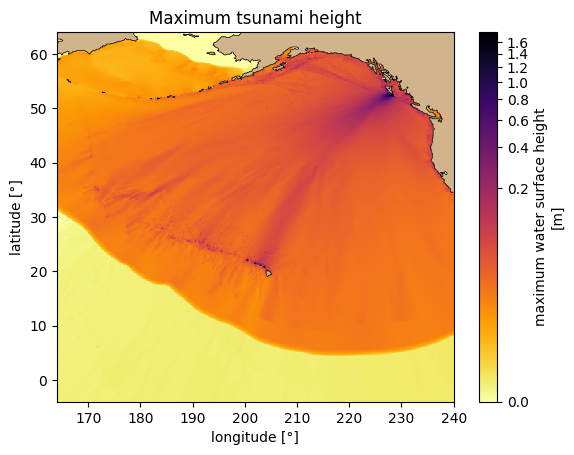

In [25]:
cmap = plt.cm.inferno_r
cmap.set_bad("tan")
fig, ax = plt.subplots()
hmax.plot(ax=ax, cmap=cmap, norm=colors.PowerNorm(0.25))
dep0.plot.contour(ax=ax, levels=[0], linewidths=0.5, colors="k")
ax.set_title("Maximum tsunami height")

## Tsunami propagation
* example file is not included in github repository
* please generate files by your own

In [26]:
nch = xr.open_mfdataset("outModel4/h/*.nc", data_vars="minimal", combine='by_coords', parallel=True )
nch

<xarray.Dataset> Size: 129MB
Dimensions:    (time: 42, longitude: 650, latitude: 590)
Coordinates:
  * time       (time) float64 336B 0.0 600.0 1.2e+03 ... 2.4e+04 2.46e+04
  * longitude  (longitude) float64 5kB 158.7 158.9 159.0 ... 245.0 245.1 245.3
  * latitude   (latitude) float64 5kB 69.27 69.13 69.0 ... -9.0 -9.133 -9.267
Data variables:
    h          (time, latitude, longitude) float64 129MB dask.array<chunksize=(6, 197, 163), meta=np.ndarray>

(3, 510, 570) (510, 570)


<Figure size 2400x800 with 0 Axes>

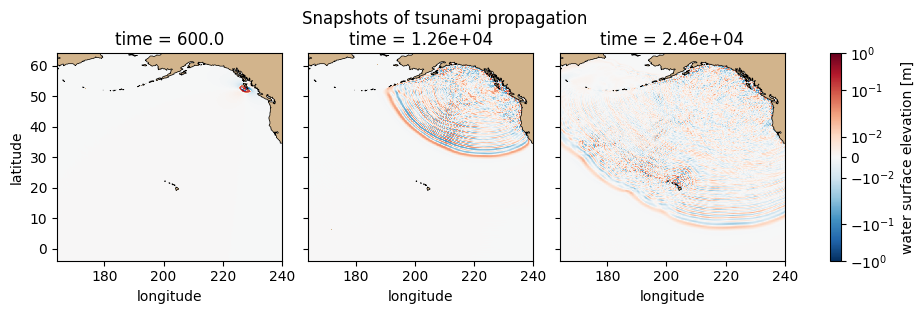

In [52]:
h = nch.h[:,40:-40,40:-40].isel(time=slice(1,42,20)).copy()
print(h.data.shape, dep0.data.shape)
h.data[dep0.data==0]=np.nan
cmap = plt.cm.RdBu_r
cmap.set_bad("tan")
fig = plt.figure(figsize=(12,4), dpi=200)
axs = h.plot(x="longitude", y="latitude", col="time", cmap=cmap, col_wrap=3, 
             norm=colors.SymLogNorm(linthresh=0.02, vmin=-1, vmax=1),
            )
for ax in axs.axs.ravel():
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    title = ax.get_title()
    dep0.plot.contour(ax=ax, levels=[0], linewidths=0.5, colors="k")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
fig.tight_layout()
plt.suptitle("Snapshots of tsunami propagation", x=0.45, y=1.03)
plt.savefig("snapshots.png", bbox_inches='tight', pad_inches=0, dpi=200)
plt.show()

## Waveform at a station

(5.0, 7.0)

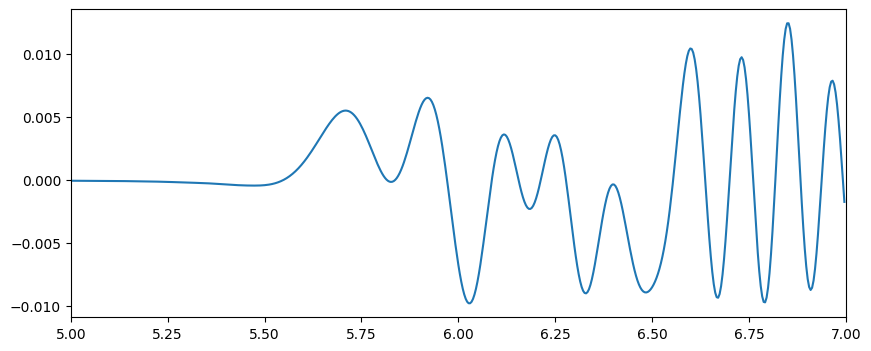

In [31]:
wf = np.load("./_output_example/model4/timeseries_station0011.npz")
plt.figure(figsize=(10,4))
plt.plot(wf["t"]/3600, wf["h"])
plt.xlim(5,7)


# Model difference

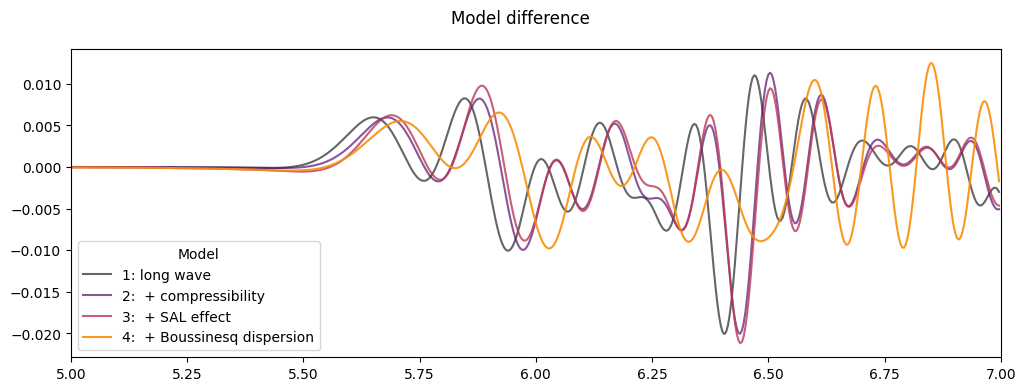

In [54]:
w1 = np.load("./_output_example/model1/timeseries_station0011.npz")
w2 = np.load("./_output_example/model2/timeseries_station0011.npz")
w3 = np.load("./_output_example/model3/timeseries_station0011.npz")
w4 = np.load("./_output_example/model4/timeseries_station0011.npz")
plt.figure(figsize=(12,4))
cmap = plt.cm.inferno
plt.plot(w1["t"]/3600, w1["h"], label="1: long wave", c=cmap(0/4), alpha=0.6)
plt.plot(w2["t"]/3600, w2["h"], label="2:  + compressibility", c=cmap(1/4), alpha=0.7)
plt.plot(w3["t"]/3600, w3["h"], label="3:  + SAL effect", c=cmap(2/4), alpha=0.8)
plt.plot(w4["t"]/3600, w4["h"], label="4:  + Boussinesq dispersion", c=cmap(3/4), alpha=0.9)
plt.xlim(5,7)
#plt.ylim(-0.025,0.025)
fig.tight_layout()
plt.legend(loc="lower left", title="Model")
plt.suptitle("Model difference")
plt.savefig("model_difference.png", bbox_inches='tight', pad_inches=0, dpi=150)
plt.show()